
 ****** Running generation 0 ****** 

Population's average fitness: 2.19693 stdev: 0.35114
Best fitness: 2.96696 - size: (1, 2) - species 1 - id 147
Average adjusted fitness: 0.551
Mean genetic distance 1.108, standard deviation 0.453
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.551     0
Total extinctions: 0
Generation time: 0.000 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.33356 stdev: 0.32870
Best fitness: 2.98534 - size: (1, 2) - species 1 - id 221
Average adjusted fitness: 0.567
Mean genetic distance 1.230, standard deviation 0.435
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.567     0
Total extinctions: 0
Generation time: 0.016 sec (0.008 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.36915 stdev: 

Mean genetic distance 2.297, standard deviation 0.795
Population of 151 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   25    41      3.0    0.583     0
     2   19    24      3.0    0.470    10
     3   10    32      3.0    0.590     1
     4    6    44      3.0    0.686     0
     5    1    10      2.0    0.167     0
Total extinctions: 0
Generation time: 0.039 sec (0.019 average)

 ****** Running generation 26 ****** 

Population's average fitness: 2.44883 stdev: 0.50596
Best fitness: 3.00000 - size: (3, 5) - species 2 - id 3925
Average adjusted fitness: 0.653
Mean genetic distance 2.441, standard deviation 0.744
Population of 151 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   26     8      3.0    0.809     0
     2   20    25      3.0    0.571     0
     3   11    28      3.0    0.599     2
     4    7    73      3.0    0.814     0
     5    2    17 

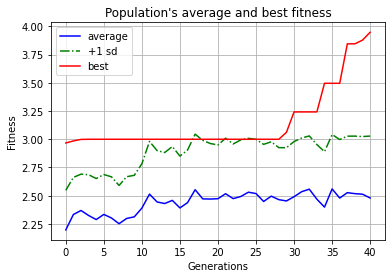

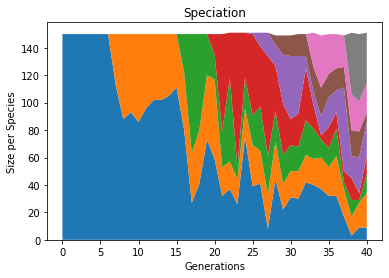

Mean genetic distance 1.605, standard deviation 0.606
Mean genetic distance 1.850, standard deviation 0.630
Mean genetic distance 1.885, standard deviation 0.678
Mean genetic distance 1.866, standard deviation 0.617
Mean genetic distance 1.871, standard deviation 0.523
Mean genetic distance 1.849, standard deviation 0.520
Mean genetic distance 1.885, standard deviation 0.586
Mean genetic distance 1.934, standard deviation 0.603
Mean genetic distance 1.946, standard deviation 0.610
Mean genetic distance 1.996, standard deviation 0.610


In [1]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import os
import neat
import visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]


global_winner = ""

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    global global_winner
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)
    
    global_winner =winner
    


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = r"C:\Users\arizona95\Desktop\arizona95\git\Brain\neat"
    config_path = os.path.join(local_dir, 'config-feedforward')
    run(config_path)

In [3]:
print('\nBest genome:\n{!s}'.format(global_winner))


Best genome:
Key: 5827
Fitness: 3.9480384781971485
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.7110340459383573, response=1.0, activation=sigmoid, aggregation=sum)
	385 DefaultNodeGene(key=385, bias=-0.5290145278921551, response=1.0, activation=sigmoid, aggregation=sum)
	661 DefaultNodeGene(key=661, bias=0.37144560789606235, response=1.0, activation=sigmoid, aggregation=sum)
	756 DefaultNodeGene(key=756, bias=1.5684701510102352, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-0.7371809537946726, enabled=True)
	DefaultConnectionGene(key=(-2, 385), weight=1.1074435089295473, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=-1.3784600823353075, enabled=True)
	DefaultConnectionGene(key=(-1, 385), weight=2.998521109260132, enabled=True)
	DefaultConnectionGene(key=(-1, 661), weight=1.9015786079001042, enabled=False)
	DefaultConnectionGene(key=(-1, 756), weight=0.12693599741595207, enabled=True)
	DefaultConnectionGene(key=(385,